# Classification and Regression

In [7]:
!pip install numpy

In [9]:
!pip install mglearn

  Using cached mglearn-0.2.0-py2.py3-none-any.whl.metadata (628 bytes)
Using cached mglearn-0.2.0-py2.py3-none-any.whl (581 kB)


In [11]:
# Ajout du chemin pour les imports (peut-être inutile dans ce contexte)
import sys
sys.path.append("..")  

# Importation des bibliothèques nécessaires
import numpy as np
import mglearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [13]:
# In[ ]: *** Classification ****

# Create a simulated training and test set
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## What is the dataset proportion used for the test set?  Can it be changed with some options?
By default, the train_test_split function uses 25% of the data for the test set and 75% for the training set.
Yes, this proportion can be modified using the test_size option.


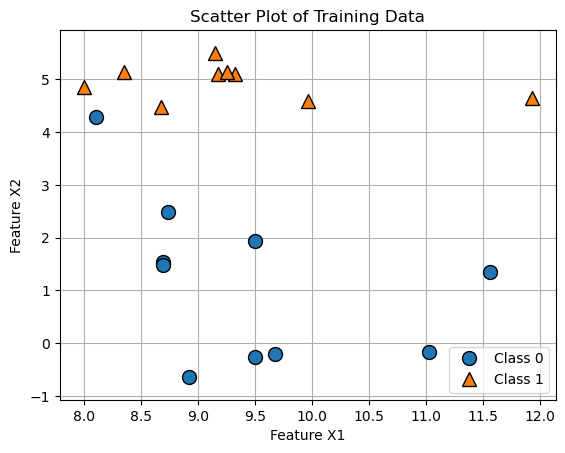

In [15]:
# Plot the training data
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.grid(True)
plt.title('Scatter Plot of Training Data')
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.show()

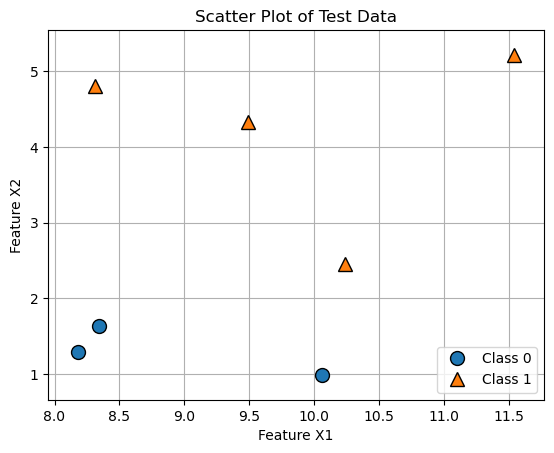

In [17]:
# Plot the test data
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
plt.grid(True)
plt.title('Scatter Plot of Test Data')
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.show()

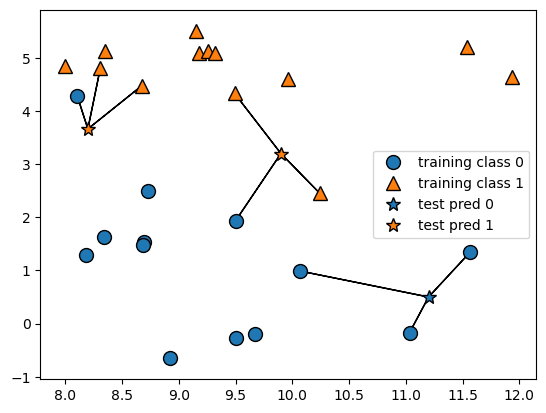

In [19]:
# Instantiate the model   
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the model using the training set 
knn.fit(X_train, y_train)

# See what is going on when k=1
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

## What happens if you increase the number of neighbors to 3?

In K-Nearest Neighbors (KNN), changing the number of neighbors affects how well the model balances between being too simple and too complex. A small k, like 1, makes the model very flexible but can cause it to memorize the training data too much, which is called overfitting. When you increase the number of neighbors, like to k=3, the model becomes more stable by considering more points around each data point before making a decision. This helps the model make better predictions on new data, especially if there is noise or outliers. However, increasing k too much can make the model too simple, which may cause underfitting, where the model misses important patterns. The goal is to find the right number of neighbors so the model performs well on new data without being too simple or too complex.

In [22]:
# Make prediction on the test set
knn.predict(X_test)
y_pred = knn.predict(X_test)

# Make prediction on specified values (X1=8; X2=2)
knn.predict([[8, 2]])

# Check the performance of the model
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classifier performance: \n', classification_report(y_test, y_pred, digits=3))

Confusion matrix: 
 [[3 0]
 [1 3]]
Classifier performance: 
               precision    recall  f1-score   support

           0      0.750     1.000     0.857         3
           1      1.000     0.750     0.857         4

    accuracy                          0.857         7
   macro avg      0.875     0.875     0.857         7
weighted avg      0.893     0.857     0.857         7



## What can you conclude by looking at the confusion matrix?

The model performs well overall with an accuracy of 85.7%. It correctly classified all 3 points in Class 0, showing no errors for this class. For Class 1, it correctly predicted 3 out of 4 points, but misclassified 1 point as belonging to Class 0. This gives Class 1 a recall of 75%, indicating that the model missed 25% of the points in this class. While the model handles Class 0 perfectly, there is a slight weakness in detecting all points from Class 1.

In [26]:
# In[ ]: *** Regression ****

# Simulated dataset for regression task
X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

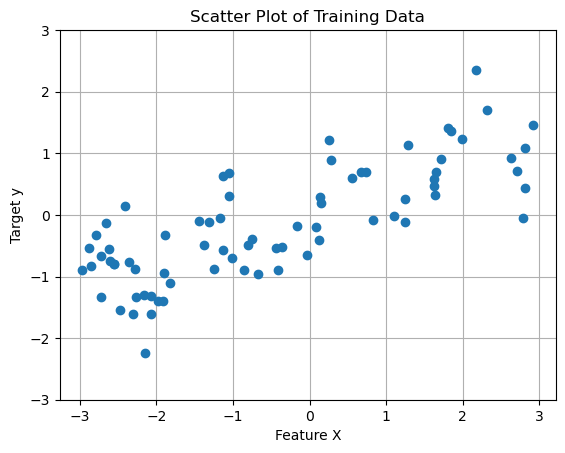

In [28]:
# Plot the training data
plt.plot(X_train, y_train, 'o')
plt.ylim(-3, 3)
plt.grid(True)
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.show()

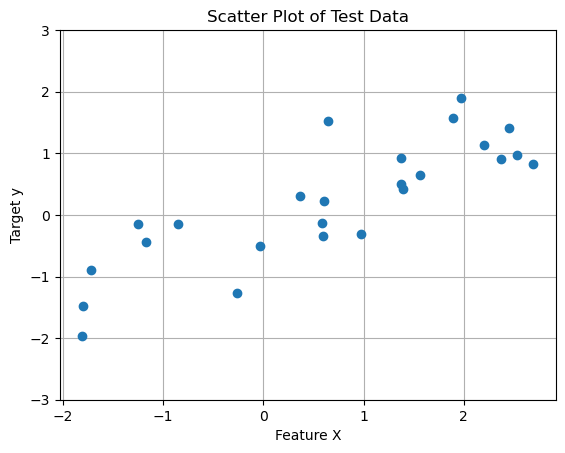

In [30]:
# Plot the test data
plt.plot(X_test, y_test, 'o')
plt.ylim(-3, 3)
plt.grid(True)
plt.title('Scatter Plot of Test Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.show()

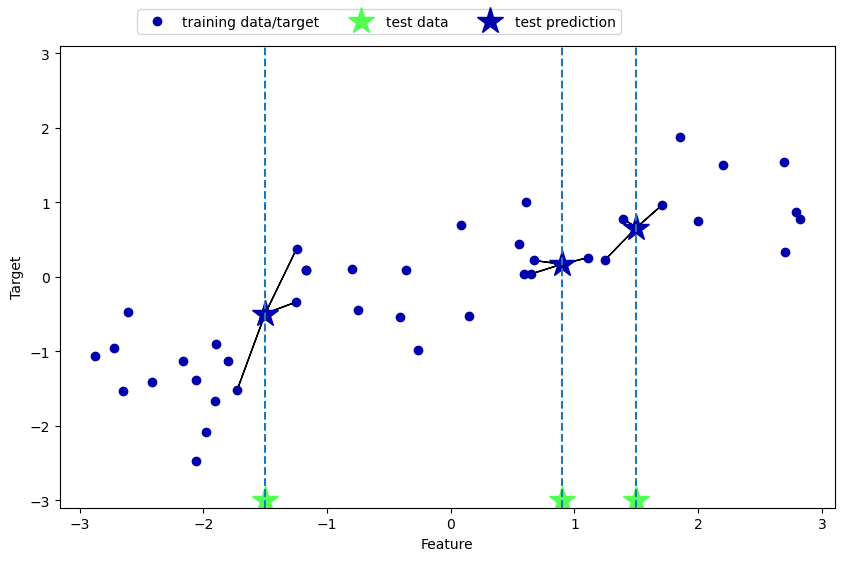

In [32]:
# Instantiate the model
knnreg = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training set 
knnreg.fit(X_train, y_train)

# See what is going on when k=1
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

## Explain the plot in a few words? How is prediction obtained for a test observation?
The plot shows a scatter plot of training and test data for a K-Nearest Neighbors (KNN) regression task. The blue circles represent training data points, while the orange triangles indicate training points from a different class. The stars represent test points, with lines connecting them to their nearest neighbors in the training set. The model uses these neighbors to make predictions.
For each test point, the KNN regression model looks at the 3 nearest neighbors (as shown by the lines). The prediction is then calculated by taking the average of the target values (y) of these 3 nearest neighbors. This is how the model estimates the output value for the test data.

In [35]:
# Make prediction on the test set
knnreg.predict(X_test)
y_pred = knnreg.predict(X_test)

# Make prediction on a new observation (X=2.5)
knnreg.predict([[2.5]])

# Check the performance of the model
print('R2 score (training): %.2f' % r2_score(y_train, knnreg.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, y_pred),
      'MSE (training): %.2f' % mean_squared_error(y_train, knnreg.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

R2 score (training): 0.84
R2 score (test) 0.67
MSE (training): 0.13
MSE (test): 0.31


In [37]:

# In[ ]: *** Selecting the optimal value of K with `GridSearchCV()` ****

# Define the range of k values to test
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initiate the model and GridSearchCV with return_train_score=True
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

## How many models will be estimated in total?

200 models will be estimated in total because we are testing 20 different values of k (from 1 to 20) and using 10-fold cross-validation. For each value of k, the model is trained and validated across 10 different folds, resulting in a total of 20 k values × 10 folds = 200 models.

In [40]:
# Fit the model on the training set 
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
# Get the best parameter k 
best_params = knn_gscv.best_params_
print('Best parameters found: ', best_params)

Best parameters found:  {'n_neighbors': 10}


In [44]:
# Extract mean squared errors for each value of k
results = knn_gscv.cv_results_
mean_test_scores = -results['mean_test_score']    # Convert from negative MSE
mean_train_scores = -results['mean_train_score']  # Convert from negative MSE

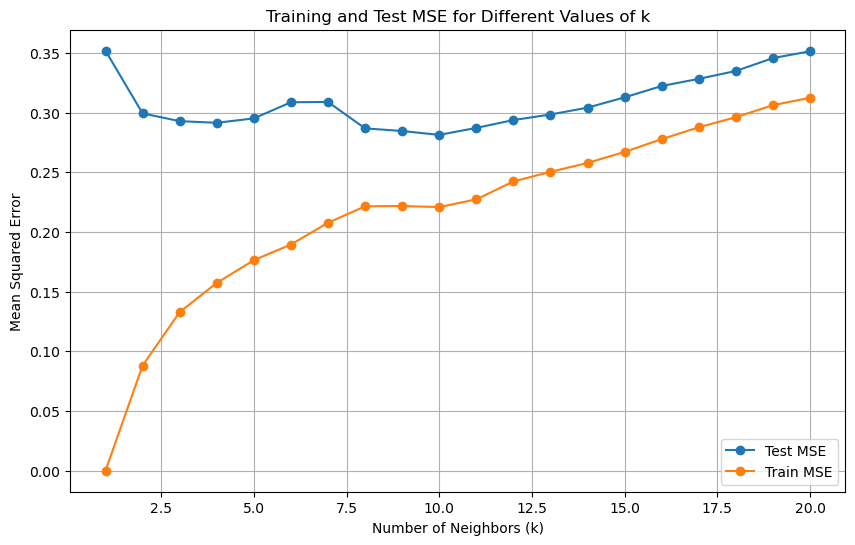

In [46]:
# Plot training and test MSE
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, label='Test MSE', marker='o')
plt.plot(param_grid['n_neighbors'], mean_train_scores, label='Train MSE', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE for Different Values of k')
plt.legend()
plt.grid(True)
plt.show()

## Which value of k leads to the lowest bias?
The value of k=1 leads to the lowest bias because it results in the lowest training error (MSE). This is when the model is most flexible and fits the training data closely. However, this may also increase the risk of overfitting.

In [49]:
# Check performance of the best model found by GridSearchCV
best_knnreg = knn_gscv.best_estimator_
y_test_pred = best_knnreg.predict(X_test)
print('MSE (test) for best model: %.2f' % mean_squared_error(y_test, y_test_pred))

MSE (test) for best model: 0.23


## Should the MSE (test) be higher or lower than the MSE obtained by cross-validation?
The MSE (test) is generally expected to be slightly higher than the MSE obtained during cross-validation. This is because the cross-validation process averages the error across multiple splits of the training data, while the test set is completely unseen during training. However, if the MSE (test) is close to the cross-validation MSE, it indicates that the model generalizes well to new data. In our case, an MSE (test) of 0.23 seems reasonable if it's close to the cross-validation MSE.

# Feature selection

In [53]:
# Data and libraries
import sys
sys.path.append("..") 
  
import pandas as pd
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

In [55]:
# Objective: forecast the insurance charges for each customer
# The data contain some personal information for each individual

# # Immport the dataset in the working environment
dat = pd.read_csv('C:/Users/USER/Downloads/Data & Codes/Data & Codes/Insurance.csv')

In [57]:
# Overview of variables
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
# Convert categorical variables to dummy variables
dat = pd.get_dummies(dat, columns=['sex', 'smoker', 'region'])

In [61]:
# In[ ]: ***************************************************************************************
# ********************************* Least Squares **********************************************
# **********************************************************************************************

# Increase the number of predictors by interacting the original features 
X = dat.drop(['charges'], axis = 1)
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names_out(X.columns))

In [63]:
# Nombre de caractéristiques dans X
num_features = X.shape[1]

# Affichage du résultat
print(f'The input X contains {num_features} features.')

The input X contains 66 features.


# How many features does input X contain? 
Input X contains 66 features

In [66]:
# Target
y = dat['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit the model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Check the performance of the model
print('RMSE (test): %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE (test): 4351.80


# Why is it more convenient to use RMSE instead of MSE in this context?
It is more convenient to use RMSE because it is expressed in the same units as the target variable, which in this case is medical charges (likely measured in dollars). This makes the error much easier to interpret. For instance, an RMSE of 4351.80 means the model's average error is around 4351 dollars, which is directly understandable. In contrast, MSE is expressed in squared units (such as "squared dollars"), which is harder to interpret in a practical context.

In [69]:
# ********************************** Best-subset selection *************************************
# **********************************************************************************************

# scikit-learn does not provide built-in functions for this method, but we can use some of its tools to implement it

# Generate all possible feature subsets
def best_subset_selection(X_train, y_train, X_test, y_test):
    best_rmse_train = float('inf')
    best_rmse_test = float('inf')
    best_features = None
    
    features = X_train.columns
    for i in range(1, len(features) + 1):
        for subset in combinations(features, i):
            rmse_train, rmse_test = evaluate_subset(subset, X_train, y_train, X_test, y_test)
            if rmse_test < best_rmse_test:
                best_rmse_train, best_rmse_test = rmse_train, rmse_test
                best_features = subset
    
    return best_features, best_rmse_train, best_rmse_test

# Define the function to calculate performance of a subset of features
def evaluate_subset(features, X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train[list(features)], y_train)
    y_pred_train = model.predict(X_train[list(features)])
    y_pred_test = model.predict(X_test[list(features)])
    return mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)


# Fit the models
best_features, best_rmse_train, best_rmse_test = best_subset_selection(X_train, y_train, X_test, y_test)

#...You can stop after a while because it will never converge!


KeyboardInterrupt: 

# How many differnet models should the function estimate?
The number of different models that the function will estimate is 2^p - 1, where p is the number of features in the dataset.

In [71]:
# In[ ]: *********************************************************************************************
# ********************************** Forward-stepwise selection **************************************
# ****************************************************************************************************

# Define the function for forward stepwise selection
def forward_stepwise_selection(X_train, y_train, X_test, y_test):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_rmse_test = float('inf')

    while remaining_features:
        best_feature = None
        for feature in remaining_features:
            current_features = selected_features + [feature]
            rmse_train, rmse_test = evaluate_features(current_features, X_train, y_train, X_test, y_test)
            if rmse_test < best_rmse_test:
                best_rmse_test = rmse_test
                best_feature = feature
        
        if best_feature is None:
            break
        
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    
    return selected_features, best_rmse_test

In [74]:
# Define the function to evaluate the performance of the model with the given features
def evaluate_features(features, X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    y_pred_train = model.predict(X_train[features])
    y_pred_test = model.predict(X_test[features])
    return mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)

# Fit the models
selected_features, best_rmse_test = forward_stepwise_selection(X_train, y_train, X_test, y_test)

# Check the selected features
print('Selected features:', selected_features)

# Check the performance of the model
print('RMSE (test): %.2f' % math.sqrt(best_rmse_test))

Selected features: ['bmi smoker_yes', 'age bmi', 'smoker_yes', 'age', 'children', 'bmi region_northeast', 'sex_female region_northwest', 'age region_northeast', 'smoker_yes region_southeast', 'bmi sex_male', 'smoker_no region_southwest', 'age sex_male', 'bmi sex_female', 'age region_southwest', 'sex_female region_southwest', 'sex_female sex_male', 'age sex_female']
RMSE (test): 4239.30


# Can you conclude that this model performs better than least-squares regression?
The forward stepwise selection model performs better than the least-squares regression model, because its RMSE (4239.30) is lower than that of the least-squares regression (4351.80)

# Does this model have a higher or lower bias than the least squares regression?
The forward stepwise selection model likely has a lower bias than the least squares regression model because it selects the most relevant features, leading to a better fit on the test set. However, without comparing variance (for example, by analyzing RMSE on the training set), it is difficult to definitively conclude the exact balance between bias and variance.

# Do you expect to find the same set of features if you used backward-stepwise selection?
We should not expect to find the exact same set of features using backward-stepwise selection as with forward-stepwise selection, because the two methods use opposite strategies to choose or eliminate features, and the feature interactions may affect the selection process differently in each case.

# Regularization

In [82]:
import sys
sys.path.append("..")   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

In [84]:
# Immport the dataset in the working environment
dat = pd.read_csv('C:/Users/USER/Downloads/Data & Codes/Data & Codes/Life Expectancy Data.csv')

# Overview of variables and NAs
list(dat)
dat.info()
dat.describe()

# Drop all the rows with NAs
dat = dat.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

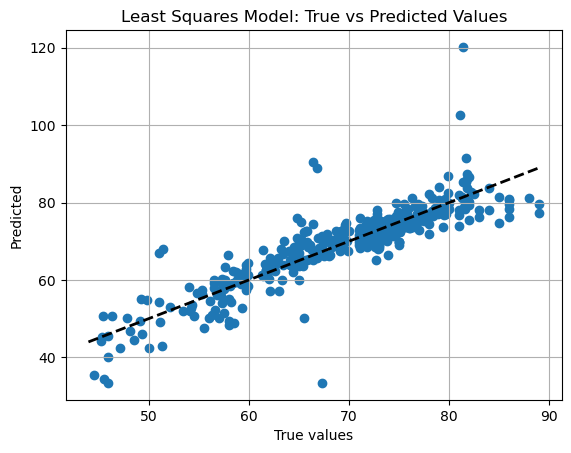

MSE (training): 8.93
MSE (test): 23.91


In [90]:
# In[ ]: ***************************************************************************************
# ********************************* Least Squares **********************************************
# **********************************************************************************************

# Drop some features 
X = dat.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1)
y = dat['Life expectancy ']

# Create polynomial features
interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = pd.DataFrame(interaction.fit_transform(X), columns= interaction.get_feature_names_out(X.columns))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit the model
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Visual check measured vs. predicted
fig, ax = plt.subplots()
plt.grid(True)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted')
ax.set_title('Least Squares Model: True vs Predicted Values')
plt.show()

# Check the performance of the model
print('MSE (training): %.2f' % mean_squared_error(y_train, lr.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

Best alpha: 12.328467394420684


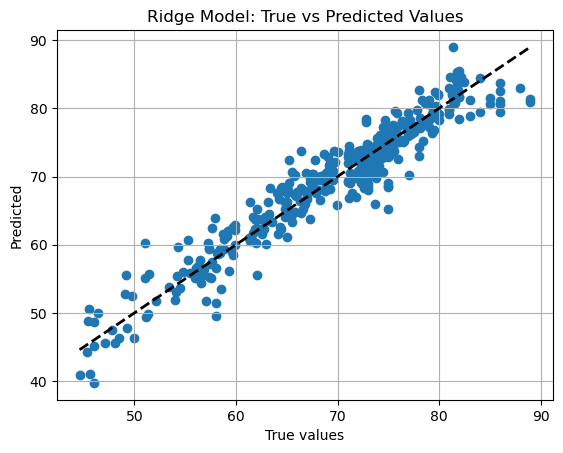

In [94]:
# In[ ]: ***************************************************************************************
# ************************* Ridge - L2 regularization ******************************************
# **********************************************************************************************
from sklearn.preprocessing import StandardScaler

# Standardize the data (ajouter cette partie pour normaliser les données)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalisation du jeu d'entraînement
X_test_scaled = scaler.transform(X_test)        # Normalisation du jeu de test

# Set values for `alpha`
alphas = np.logspace(-4, 4, 100)

# Instantiate the model with cross-validation (supprimez "normalize=True")
ridgecv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')

# Fit the model (utilisez les données normalisées)
ridgecv.fit(X_train_scaled, y_train)

# Best value of `alpha`
print(f'Best alpha: {ridgecv.alpha_}')

# Make predictions on the test set (utilisez les données normalisées)
y_pred = ridgecv.predict(X_test_scaled)

# Visual check measured vs. predicted
fig, ax = plt.subplots()
plt.grid(True)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted')
ax.set_title('Ridge Model: True vs Predicted Values')
plt.show()


# Compare this plot with the previous one of least squares regression. What can you conclude?

Based on the comparison of the two graphs, the Ridge Model gives more accurate predictions than the Least Squares Model. In the Ridge plot, the points are closer to the diagonal line, meaning the predictions are better. The Least Squares plot has more points that are far from the line, showing it doesn't fit the data as well. This means Ridge Regression helps to reduce errors and makes more reliable predictions by controlling overfitting.

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustement du modèle RidgeCV sur les données normalisées
ridgecv.fit(X_train_scaled, y_train)

# Prédiction sur le jeu de test
y_pred_train = ridgecv.predict(X_train_scaled)
y_pred_test = ridgecv.predict(X_test_scaled)

# Vérifier la performance du modèle
print('MSE (training): %.2f' % mean_squared_error(y_train, y_pred_train),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred_test), sep='\n')

MSE (training): 6.33
MSE (test): 7.38


## Does this model work better or worse than least squares regression? 

The Ridge Regression model works better than the Least Squares Regression model. Ridge has a lower MSE on the training data (6.33 compared to 8.93 for Least Squares), meaning it fits the training data more accurately. More importantly, Ridge performs much better on the test data with a lower MSE (7.38 compared to 23.91 for Least Squares). This shows that Ridge Regression helps prevent overfitting by making the model less complex, which makes it more reliable for making predictions on new data.

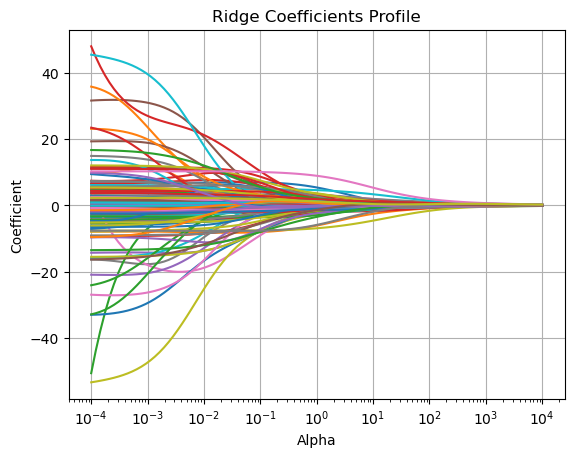

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation des coefficients pour chaque alpha
coefs = []
alphas = np.logspace(-4, 4, 100)  # Référence à vos valeurs de alpha

# Pour chaque valeur d'alpha, ajuster le modèle Ridge et collecter les coefficients
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Supprimez "normalize=True"
    ridge.fit(X_train_scaled, y_train)  # Utilisez les données normalisées
    coefs.append(ridge.coef_)

# Tracé du profil de régularisation des coefficients Ridge
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients Profile')
plt.axis('tight')
plt.grid(True)
plt.show()


In [119]:

# ************************* LASSO - L1 regularization ******************************************
# **********************************************************************************************

# Instantiate the model with cross-validation
# The option alphas = None may set the grid automatically
from sklearn.linear_model import LassoCV

# Instancier le modèle sans l'argument "normalize"
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)

# Why is it necessary to set a maximum number of iterations? 
Setting a maximum number of iterations is important because it limits how long an algorithm will run. In some models, like LASSO or Ridge Regression, the algorithm updates the solution step by step. If the problem is complex or the algorithm is slow to improve, it could keep running forever. By setting a maximum number of iterations, we make sure the process stops after a certain point, even if it hasn’t found the best answer yet. This helps save time and computing power.









In [122]:
# Fit the model
lassocv.fit(X_train, y_train)

# Best value of `alpha`
print(f'Best alpha: {lassocv.alpha_}')

# How many coefficients are set to zero
num_zero_coefficients = np.sum(lassocv.coef_ == 0)
print(f'Number of features dropped: {num_zero_coefficients}')

print('MSE (training): %.2f' % mean_squared_error(y_train, lassocv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, lassocv.predict(X_test)), sep='\n')

Best alpha: 4160226398113933.0
Number of features dropped: 188
MSE (training): 75.41
MSE (test): 82.97


# Does this model perform better or worse than Ridge regression? 

The Ridge regression model performs better than the Lasso model based on the results. The MSE values for Lasso are much higher on both the training (75.41) and test data (82.97) compared to Ridge (e.g., 6.33 for training and 7.38 for test), indicating that Ridge provides more accurate predictions. While Lasso drops 188 features, simplifying the model, this comes at the cost of increased errors. In contrast, Ridge keeps all features but regularizes them, leading to better overall performance in this case.

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.185e+03, tolerance: 9.325e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.186e+03, tolerance: 9.325e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.188e+03, tolerance: 

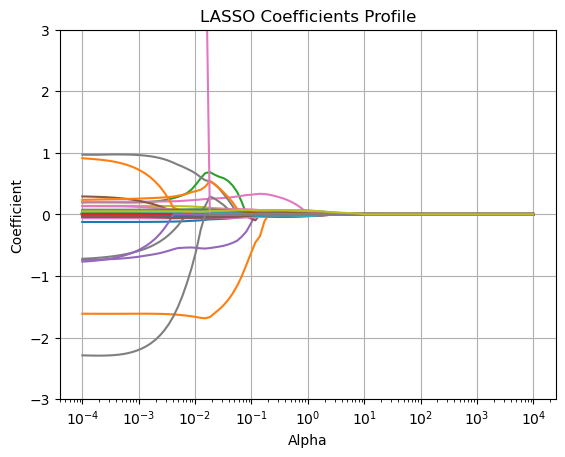

In [125]:
# Plot the LASSO profile (coefficients as a function of regularization)
coefs = []
for alpha in np.logspace(-4, 4, 100):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

fig, ax = plt.subplots()
ax.plot(np.logspace(-4, 4, 100), coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient')
ax.set_title('LASSO Coefficients Profile')
plt.ylim(-3, 3)
ax.grid(True)
plt.show()


# What is the difference in the LASSO coefficient profile compared to Ridge above?

The main difference between the Ridge and Lasso coefficient profiles is that Lasso can remove features by setting their coefficients to zero as the regularization parameter alpha increases. This means Lasso performs feature selection, keeping only the most important features. In contrast, Ridge only shrinks the size of the coefficients but never fully removes them, so all features remain in the model, just with smaller values. As a result, Lasso creates simpler models with fewer features, while Ridge keeps all features, making the model less sparse.

In [131]:
# ************************************ Elastic Net *********************************************
# **********************************************************************************************

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

# Normalize the data manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of alpha and l1_ratio values 
alphas = np.logspace(-4, 4, 100)  
l1_ratios = np.linspace(0, 1, 11)  

# Instantiate the model without the 'normalize' parameter
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, max_iter=1000, tol=1e-4)

# Why is it necessary to set a tolerance in the optimization algorithm?

Setting a tolerance in an optimization algorithm tells the algorithm when to stop running. The algorithm works by trying to improve the solution step by step. However, at some point, the improvements get very small, and the solution is "good enough." The tolerance sets a limit for how small the improvement needs to be before the algorithm stops. Without this, the algorithm might run forever or stop too soon. So, the tolerance helps the algorithm stop at the right time, saving time and computing power.

In [ ]:
# Fit the model on the training data
elasticnetcv.fit(X_train, y_train)

# Best values of alpha and l1_ratio
print(f'Best alpha: {elasticnetcv.alpha_}')
print(f'Best l1_ratio: {elasticnetcv.l1_ratio_}')

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5473.041737865538, tolerance: 8.244599708633093
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Object

# What can you conclude by looking at the best l1_ratio?

In [139]:
# Check the performance of the model
print('MSE (training): %.2f' % mean_squared_error(y_train, elasticnetcv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, elasticnetcv.predict(X_test)), sep='\n')

MSE (training): 5.14
MSE (test): 9.16
